In [1]:
from ay_torch import *
import os
%matplotlib widget

In [2]:
from cnn_sqptn1_1 import SqPtn1Dataset
# root='data_generated/sqptn1/'
root='data_generated/sqptn1l/'  #Large dataset size

def GetDataTransforms(mode):
  if mode=='train':
    return torchvision.transforms.Compose([
        # torchvision.transforms.Resize(224),
        # torchvision.transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
        #torchvision.transforms.RandomResizedCrop(224),
        torchvision.transforms.RandomHorizontalFlip(),
        # torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0, hue=0),
        torchvision.transforms.ToTensor(),
        # torchvision.transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
      ])
  if mode=='eval':
    return torchvision.transforms.Compose([
        # torchvision.transforms.Resize(224),
        #torchvision.transforms.Resize(256),
        #torchvision.transforms.CenterCrop(224),
        torchvision.transforms.ToTensor(),
        # torchvision.transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
      ])
  if mode=='none':
    return torchvision.transforms.Compose([
        # torchvision.transforms.Resize(224),
        #torchvision.transforms.RandomResizedCrop(224),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor()
      ])

In [3]:
dset_train= SqPtn1Dataset(root=root, transform=GetDataTransforms('train'), train=True)
dset_test= SqPtn1Dataset(root=root, transform=GetDataTransforms('eval'), train=False)
#NOTE: Adjust the batch and epoch sizes.
n_batch= 64
dl_train= torch.utils.data.DataLoader(
              dataset=dset_train,
              batch_size=n_batch,
              shuffle=True,
              num_workers=2)
dl_test= torch.utils.data.DataLoader(
              dataset=dset_test,
              batch_size=n_batch,
              shuffle=False,
              num_workers=2)

In [4]:
print('dset_train size:',len(dset_train))
print('dset_train[0] input type, shape:',type(dset_train[0][0]),dset_train[0][0].shape)
print('dset_train[0] label value:',dset_train[0][1])
#print('dset_train[0][0] value:',dset_train[0][0][:,100:110,100:110])
print('dset_train[0][0] value range:',torch.min(dset_train[0][0]),torch.max(dset_train[0][0]))
print('dset_test size:',len(dset_test))
print('dset_test[0] input type, shape:',type(dset_test[0][0]),dset_test[0][0].shape)
print('dset_test[0] label value:',dset_test[0][1])
print('dset_test[0][0] value range:',torch.min(dset_test[0][0]),torch.max(dset_test[0][0]))

dset_train size: 4000
dset_train[0] input type, shape: <class 'torch.Tensor'> torch.Size([3, 200, 200])
dset_train[0] label value: tensor([0.9576])
dset_train[0][0] value range: tensor(0.) tensor(1.)
dset_test size: 2000
dset_test[0] input type, shape: <class 'torch.Tensor'> torch.Size([3, 200, 200])
dset_test[0] label value: tensor([0.3696])
dset_test[0][0] value range: tensor(0.) tensor(1.)


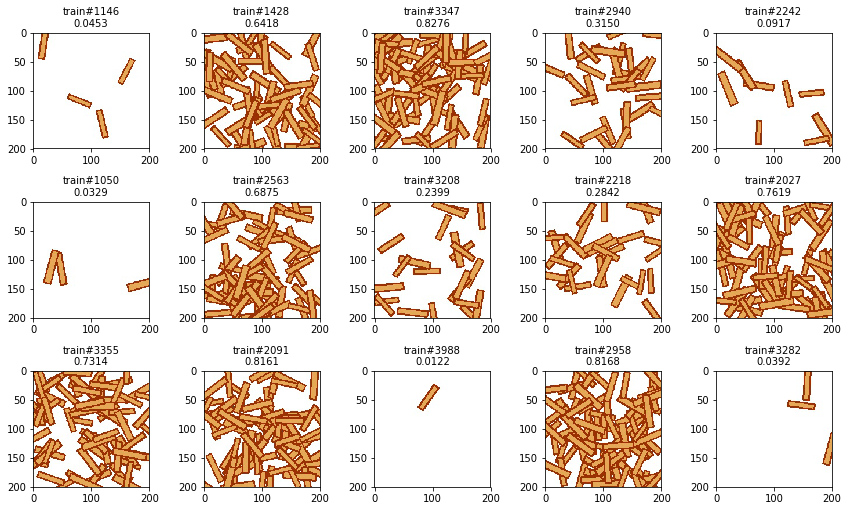

In [5]:
d= dset_train
idxes= np.random.permutation(len(d))[:15]
imgs= [d[i][0] for i in idxes]
labels= [f'train#{i}\n{d[i][1].item():.4f}' for i in idxes]
PlotImgGrid(imgs, labels)

# Using ResNet-18 with pretrained parameters

In [4]:
#Setup a neural network.
net= TResNet18(in_channels=3, out_channels=1)

#Load pretrained model parameters.
url= 'https://s3.amazonaws.com/fast-ai-modelzoo/xrn50_940.pth'
net.load_state_dict(torchvision.models.utils.load_state_dict_from_url(url, map_location='cpu')['model'], strict=False)

device= torch.device('cuda')

#Setup an optimizer and a loss function.
opt= torch.optim.Adam(net.parameters(), lr=0.01)
f_loss= torch.nn.MSELoss()
# f_loss= torch.nn.CrossEntropyLoss()

def decode(pred):
  return pred

def rmse(y,y_trg):
  return torch.sqrt(torch.nn.functional.mse_loss(y,y_trg))
f_metric= rmse

def tfm_batch(batch):
  x,y= batch
  return x,y
logger= TLogger()
disp= TDisp()

NameError: name 'TResNet18' is not defined

In [2]:
input_size= (1,)+dset_train[0][0].shape
print(f'input_size={input_size}')
torchinfo.summary(net, input_size)

NameError: name 'dset_train' is not defined

In [3]:
lr,(lr_min,lr_max,_)= FindLR(net, opt=opt, f_loss=f_loss, dl_train=dl_train, tfm_batch=tfm_batch, device=device)
print(f'lr= {lr}, lr_min={lr_min}, lr_max={lr_max}')

NameError: name 'FindLR' is not defined

i_epoch	loss(train)	loss(test)	metric(test)	time
30	0.00027225	0.00077953	0.02775100	9.854468
31	0.00026932	0.00073125	0.02687216	9.727723
32	0.00029763	0.00072436	0.02673845	9.735492
33	0.00027034	0.00083022	0.02863778	9.694244
34	0.00024065	0.00071702	0.02659586	9.701958
i_epoch	loss(train)	loss(test)	metric(test)	time
35	0.00024944	0.00082876	0.02858711	9.740724
36	0.00030742	0.00115016	0.03374812	9.719340
37	0.00029936	0.00077154	0.02759871	9.744696
38	0.00021709	0.00073280	0.02689123	9.723939
39	0.00020495	0.00072887	0.02681300	9.761722
i_epoch	loss(train)	loss(test)	metric(test)	time
40	0.00024715	0.00081552	0.02838632	9.808818
41	0.00024082	0.00078436	0.02782621	9.720627
42	0.00022725	0.00078276	0.02780190	9.736544
43	0.00022692	0.00072392	0.02673262	9.767601
44	0.00020868	0.00071712	0.02660164	9.741949


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…
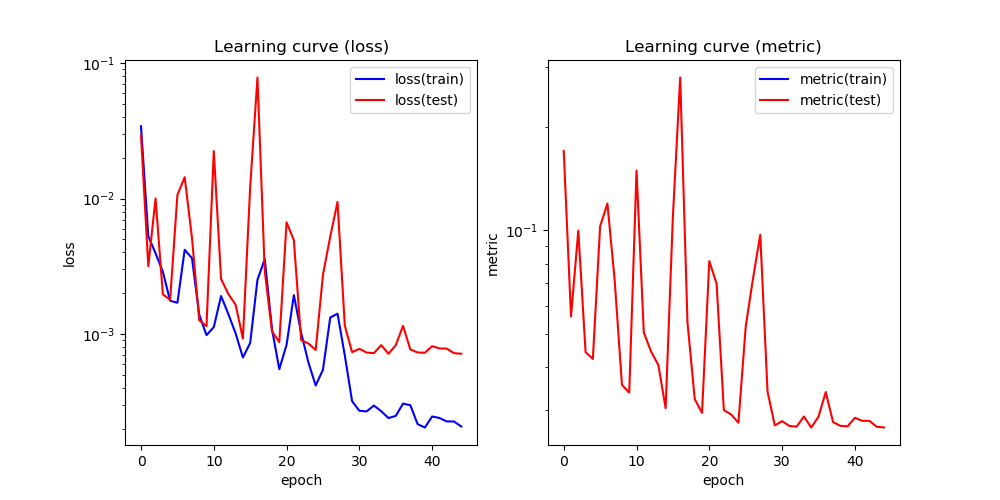

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…
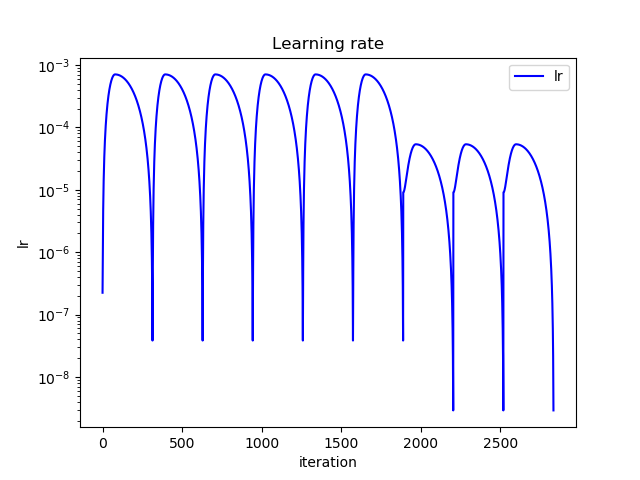

In [365]:
for i in range(3):
  FitOneCycle(net, n_epoch=5, lr_max=lr_max, div_init=lr_max/lr_min, 
      opt=opt, f_loss=f_loss, f_metric=f_metric,
      dl_train=dl_train, dl_test=dl_test, tfm_batch=tfm_batch,
      callbacks=(logger.Callbacks(),disp.Callbacks()),
      device=device)
logger.Plot()
logger.PlotLR()

# Using tiny ResNet

In [20]:
class TResNetTiny(torch.nn.Module):
  def __init__(self, n_classes):
    super(TResNetTiny,self).__init__()
    # n_layers= [3,16,32,64,128,256]
    # strides= [1,2,2,2,2,2]  #For 224x224 images
    n_layers= [3,16,32,64,128]
    strides= [1,2,2,2,2]  #For 224x224 images
    self.net= torch.nn.Sequential(
          *[TResBlock(1, c_in, c_out, kernel_size=3, stride=s) for c_in,c_out,s in zip(n_layers[:-1],n_layers[1:],strides)],
          torch.nn.AdaptiveAvgPool2d(1),
          torch.nn.Flatten(),
          torch.nn.Linear(n_layers[-1], n_classes)
          )
  def forward(self, x):
    return self.net(x)

In [32]:
#Setup a neural network.
net= TResNetTiny(n_classes=1)

device= torch.device('cuda')

#Setup an optimizer and a loss function.
opt= torch.optim.Adam(net.parameters(), lr=0.01)
f_loss= torch.nn.MSELoss()
# f_loss= torch.nn.CrossEntropyLoss()

def decode(pred):
  return pred

def rmse(y,y_trg):
  return torch.sqrt(torch.nn.functional.mse_loss(y,y_trg))
f_metric= rmse

def tfm_batch(batch):
  x,y= batch
  return x,y
logger= TLogger()
disp= TDisp()

In [33]:
input_size= (1,)+dset_train[0][0].shape
print(f'input_size={input_size}')
torchinfo.summary(net, input_size)

input_size=(1, 3, 200, 200)


Layer (type:depth-idx)                        Output Shape              Param #
TResNetTiny                                   --                        --
├─Sequential: 1-1                             [1, 1]                    --
│    └─TResBlock: 2-1                         [1, 16, 200, 200]         --
│    │    └─Sequential: 3-1                   [1, 16, 200, 200]         2,800
│    │    └─Sequential: 3-2                   [1, 16, 200, 200]         80
│    │    └─ReLU: 3-3                         [1, 16, 200, 200]         --
│    └─TResBlock: 2-2                         [1, 32, 100, 100]         --
│    │    └─Sequential: 3-4                   [1, 32, 100, 100]         13,952
│    │    └─Sequential: 3-5                   [1, 32, 100, 100]         576
│    │    └─ReLU: 3-6                         [1, 32, 100, 100]         --
│    └─TResBlock: 2-3                         [1, 64, 50, 50]           --
│    │    └─Sequential: 3-7                   [1, 64, 50, 50]           55,552
│    │  

FindLR progress: 0.0%
FindLR progress: 20.0%
FindLR progress: 40.0%
FindLR progress: 60.0%
FindLR progress: 80.0%
FindLR progress: 100.0%


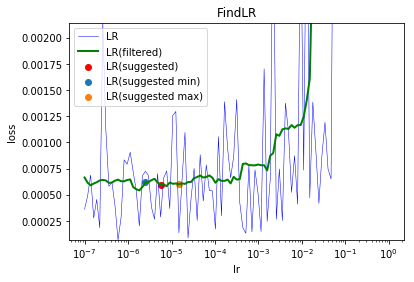

lr= 5.62341325190349e-06, lr_min=2.5118864315095806e-06, lr_max=1.4791083881682072e-05


In [48]:
lr,(lr_min,lr_max,_)= FindLR(net, opt=opt, f_loss=f_loss, dl_train=dl_train, tfm_batch=tfm_batch, device=device)
print(f'lr= {lr}, lr_min={lr_min}, lr_max={lr_max}')

i_epoch	loss(train)	loss(test)	metric(test)	time
80	0.00060198	0.00169834	0.04058761	1.217754
81	0.00072610	0.00138698	0.03655604	1.176345
82	0.00062783	0.00182176	0.04207990	1.154259
83	0.00080972	0.00223742	0.04674841	1.146404
84	0.00070542	0.00087114	0.02860340	1.117145
85	0.00068264	0.00078979	0.02713324	1.160592
86	0.00071915	0.00135064	0.03607112	1.188259
87	0.00073379	0.00149919	0.03806940	1.144071
88	0.00073642	0.00248743	0.04934018	1.188409
89	0.00074711	0.00149626	0.03801363	1.202202


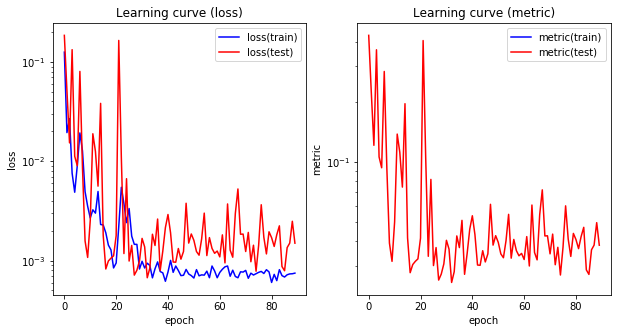

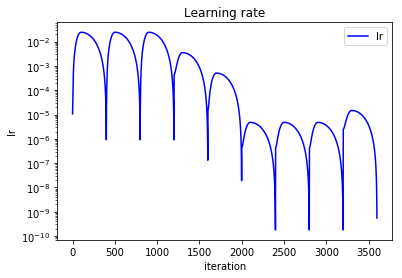

In [49]:
FitOneCycle(net, n_epoch=10, lr_max=lr_max, div_init=lr_max/lr_min, 
    opt=opt, f_loss=f_loss, f_metric=f_metric,
    dl_train=dl_train, dl_test=dl_test, tfm_batch=tfm_batch,
    callbacks=(logger.Callbacks(),disp.Callbacks()),
    device=device)
logger.Plot()
logger.PlotLR()

# ResNet + ResDenseBlock

In [30]:
class TMax(torch.nn.Module):
  def __init__(self, axis=0):
    super(TMax,self).__init__()
    self.axis= axis
  def forward(self, x):
    return torch.max(x, axis=self.axis)[0].unsqueeze(self.axis)

class TResDenseNet(torch.nn.Module):
  def __init__(self, in_imgshape, out_channels, n_hiddens=4, hidden_channels=1000, p_dropout=0.0):
    super(TResDenseNet,self).__init__()
    n_layers= [in_imgshape[0],16,32,64,128]
    strides= [1,1,1,2,2]
    resnet= torch.nn.Sequential(
          *[TResBlock(1, c_in, c_out, kernel_size=3, stride=s) for c_in,c_out,s in zip(n_layers[:-1],n_layers[1:],strides)],
          # ConvLayer(n_layers[-1], 1, kernel_size=1, norm_type=None, activation=None),
          TMax(axis=1),
          torch.nn.Flatten(),
          )
    ndim_resnet_out= resnet(torch.zeros(in_imgshape).unsqueeze(0)).shape[1]
    densenet= torch.nn.Sequential(
          torch.nn.Linear(ndim_resnet_out, hidden_channels),
          torch.nn.ReLU(),
          torch.nn.Dropout(p_dropout),
          *[TResDenseBlock(hidden_channels, hidden_channels) for i in range(n_hiddens)],
          torch.nn.Dropout(p_dropout),
          torch.nn.Linear(hidden_channels, out_channels),
          )
    self.net= torch.nn.Sequential(resnet, densenet)
  def forward(self, x):
    return self.net(x)

class TResDenseNet2(torch.nn.Module):
  def __init__(self, in_imgshape, out_channels, 
               res_layers=[2, 2, 2, 2], res_stem_sizes=(32,32,64), res_expansion=1,
               res_kernel_size=3, res_stride=2, res_stem_stride=None, res_pool_stride=None,
               n_hiddens=4, hidden_channels=200, p_dropout=0.0):
    super(TResDenseNet2,self).__init__()
    resnet= TResNet(TResBlock, expansion=res_expansion, layers=res_layers, in_channels=in_imgshape[0], 
                    kernel_size=res_kernel_size, with_fc=False,
                    stem_sizes=res_stem_sizes, stride=res_stride, stem_stride=res_stem_stride, pool_stride=res_pool_stride)
    connectnet= torch.nn.Sequential(
          # getattr(torch.nn, f'AdaptiveAvgPool{ndim}d')(output_size=1), 
          ConvLayer(resnet.out_channels, 1, kernel_size=1, norm_type=None, activation=None),
          # TMax(axis=1),
          torch.nn.Flatten(),
          )
    ndim_resnet_out= connectnet(resnet(torch.zeros(in_imgshape).unsqueeze(0))).shape[1]
    print(f'Info: ndim_resnet_out={ndim_resnet_out}')
    densenet= torch.nn.Sequential(
          torch.nn.Linear(ndim_resnet_out, hidden_channels),
          torch.nn.ReLU(),
          torch.nn.Dropout(p_dropout),
          *[TResDenseBlock(hidden_channels, hidden_channels) for i in range(n_hiddens)],
          torch.nn.Dropout(p_dropout),
          torch.nn.Linear(hidden_channels, out_channels),
          )
    self.net= torch.nn.Sequential(resnet, connectnet, densenet)
  def forward(self, x):
    return self.net(x)
  # class TResNet2(TResNet):
  #   def __init__(self, in_imgshape, layers, expansion, stem_sizes, stride):
  #     self.block       = TResBlock
  #     self.expansion   = expansion
  #     self.activation  = torch.nn.ReLU
  #     self.ndim        = 2
  #     self.kernel_size = 3
  #     stem_sizes= [in_imgshape[0], *stem_sizes]
  #     stem= [ConvLayer(stem_sizes[i], stem_sizes[i+1], kernel_size=self.kernel_size, stride=stride if i==0 else 1, ndim=2)
  #             for i in range(len(stem_sizes)-1)]
  #     block_sizes= [o for o in [stem_sizes[-1],128,256,512] +[256]*(len(layers)-4)]
  #     block_sizes= [64] + block_sizes
  #     blocks= self.make_blocks(layers, block_sizes, self_attention=False, stride=stride)
  #     super(TResNet,self).__init__(  #NOTE: This should not be a super of TResDenseNet2
  #           *stem, 
  #           torch.nn.MaxPool2d(kernel_size=self.kernel_size, stride=stride, padding=self.kernel_size//2),
  #           *blocks
  #           )
  #     self.out_channels= block_sizes[len(layers)]

In [9]:
#Setup a neural network.
in_imgshape= dset_train[0][0].shape
# net= TResDenseNet(in_imgshape=in_imgshape, out_channels=1)
net= TResDenseNet2(in_imgshape=in_imgshape, out_channels=1)  #min(metric)=0.02188881

device= torch.device('cuda')

#Setup an optimizer and a loss function.
opt= torch.optim.Adam(net.parameters(), lr=0.01)
f_loss= torch.nn.MSELoss()
# f_loss= torch.nn.CrossEntropyLoss()

def decode(pred):
  return pred

def rmse(y,y_trg):
  return torch.sqrt(torch.nn.functional.mse_loss(y,y_trg))
f_metric= rmse

def tfm_batch(batch):
  x,y= batch
  return x,y
logger= TLogger()
disp= TDisp()

Info: ndim_resnet_out=16


In [10]:
# net
input_size= (1,)+dset_train[0][0].shape
print(f'input_size={input_size}')
torchinfo.summary(net, input_size)

input_size=(1, 3, 200, 200)


Layer (type:depth-idx)                                  Output Shape              Param #
TResDenseNet2                                           --                        --
├─Sequential: 1-1                                       [1, 1]                    --
│    └─TResNet: 2-1                                     [1, 512, 4, 4]            --
│    │    └─Sequential: 3-1                             [1, 32, 200, 200]         928
│    │    └─Sequential: 3-2                             [1, 32, 100, 100]         9,280
│    │    └─Sequential: 3-3                             [1, 64, 50, 50]           18,560
│    │    └─MaxPool2d: 3-4                              [1, 64, 25, 25]           --
│    │    └─Sequential: 3-5                             [1, 64, 25, 25]           147,968
│    │    └─Sequential: 3-6                             [1, 128, 13, 13]          525,568
│    │    └─Sequential: 3-7                             [1, 256, 7, 7]            2,099,712
│    │    └─Sequential: 3-8        

FindLR progress: 0.0%
FindLR progress: 20.0%
FindLR progress: 40.0%
FindLR progress: 60.0%
FindLR progress: 80.0%
FindLR progress: 100.0%


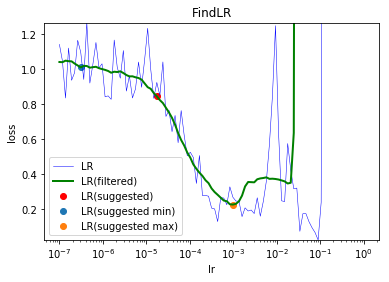

lr= 1.7378008287493757e-05, lr_min=3.090295432513591e-07, lr_max=0.00097723722095581


In [11]:
lr,(lr_min,lr_max,_)= FindLR(net, opt=opt, f_loss=f_loss, dl_train=dl_train, tfm_batch=tfm_batch, device=device)
print(f'lr= {lr}, lr_min={lr_min}, lr_max={lr_max}')

i_epoch	loss(train)	loss(test)	metric(test)	time
85	0.00069852	0.00197324	0.04404101	6.974375
86	0.00280884	0.00441489	0.06617968	6.806212
87	0.00217389	0.00128342	0.03564319	6.831938
88	0.00110382	0.00096854	0.03100260	6.923271
89	0.00060155	0.00080934	0.02827520	6.881052
i_epoch	loss(train)	loss(test)	metric(test)	time
90	0.00062374	0.00135256	0.03636408	6.853070
91	0.00148558	0.00187009	0.04305900	6.878070
92	0.00173686	0.00081873	0.02847714	6.828772
93	0.00079321	0.00078352	0.02775238	6.878265
94	0.00050825	0.00075879	0.02741479	6.883483
i_epoch	loss(train)	loss(test)	metric(test)	time
95	0.00055210	0.00115814	0.03393737	6.792543
96	0.00219519	0.00227082	0.04727789	6.914550
97	0.00197044	0.00123679	0.03497576	6.886729
98	0.00073339	0.00079022	0.02798990	6.891075
99	0.00048555	0.00081592	0.02841691	6.888720
i_epoch	loss(train)	loss(test)	metric(test)	time
100	0.00065309	0.00265633	0.05130654	6.843447
101	0.00123563	0.00353734	0.05887235	6.870710
102	0.00111177	0.00110603	0.03296563	

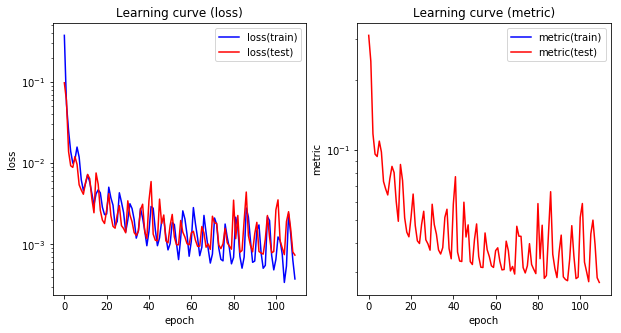

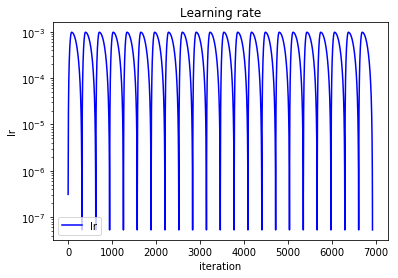

In [17]:
for i in range(5):
  FitOneCycle(net, n_epoch=5, lr_max=lr_max, div_init=lr_max/lr_min, 
      opt=opt, f_loss=f_loss, f_metric=f_metric,
      dl_train=dl_train, dl_test=dl_test, tfm_batch=tfm_batch,
      callbacks=(logger.Callbacks(),disp.Callbacks()),
      device=device)
logger.Plot()
logger.PlotLR()

In [31]:
#Setup a neural network.
in_imgshape= dset_train[0][0].shape
# net= TResDenseNet(in_imgshape=in_imgshape, out_channels=1)
# net= TResDenseNet2(in_imgshape=in_imgshape, out_channels=1)  #min(metric)=0.02188881
# net= TResDenseNet2(in_imgshape=in_imgshape, out_channels=1, res_layers=[2, 2])
# net= TResDenseNet2(in_imgshape=in_imgshape, out_channels=1, res_layers=[2,2,2], res_stem_sizes=(32,64), 
#                    res_stride=1,res_stem_stride=[1,2,1], res_pool_stride=2)  #min(metric)=0.0236337/120epc
net= TResDenseNet2(in_imgshape=in_imgshape, out_channels=1, res_layers=[2,2,2], res_stem_sizes=(32,64), 
                   res_kernel_size=5, res_stride=1,res_stem_stride=[1,2,1], res_pool_stride=2)  #min(metric)=0.0236337/120epc
# TResDenseNet2(self, in_imgshape, out_channels, 
#               res_layers=[2, 2, 2, 2], res_stem_sizes=(32,32,64), res_expansion=1,
#               res_kernel_size=3, res_stride=2, res_stem_stride=None, res_pool_stride=None,
#               n_hiddens=4, hidden_channels=200, p_dropout=0.0):
# net= TResDenseNet2(in_imgshape=in_imgshape, out_channels=1, res_layers=[2, 2], hidden_channels=1000)  #min(metric)=0.026139

device= torch.device('cuda')

#Setup an optimizer and a loss function.
opt= torch.optim.Adam(net.parameters(), lr=0.01)
f_loss= torch.nn.MSELoss()
# f_loss= torch.nn.CrossEntropyLoss()

def decode(pred):
  return pred

def rmse(y,y_trg):
  return torch.sqrt(torch.nn.functional.mse_loss(y,y_trg))
f_metric= rmse

def tfm_batch(batch):
  x,y= batch
  return x,y
logger= TLogger()
disp= TDisp()

Info: ndim_resnet_out=2500


In [32]:
# net
input_size= (1,)+dset_train[0][0].shape
print(f'input_size={input_size}')
torchinfo.summary(net, input_size)

input_size=(1, 3, 200, 200)


Layer (type:depth-idx)                                  Output Shape              Param #
TResDenseNet2                                           --                        --
├─Sequential: 1-1                                       [1, 1]                    --
│    └─TResNet: 2-1                                     [1, 256, 50, 50]          --
│    │    └─Sequential: 3-1                             [1, 32, 200, 200]         2,464
│    │    └─Sequential: 3-2                             [1, 64, 100, 100]         51,328
│    │    └─MaxPool2d: 3-3                              [1, 64, 50, 50]           --
│    │    └─Sequential: 3-4                             [1, 64, 50, 50]           410,112
│    │    └─Sequential: 3-5                             [1, 128, 50, 50]          1,443,072
│    │    └─Sequential: 3-6                             [1, 256, 50, 50]          5,769,728
│    └─Sequential: 2-2                                  [1, 2500]                 --
│    │    └─Sequential: 3-7       

FindLR progress: 0.0%
FindLR progress: 20.0%
FindLR progress: 40.0%
FindLR progress: 60.0%
FindLR progress: 80.0%
FindLR progress: 100.0%


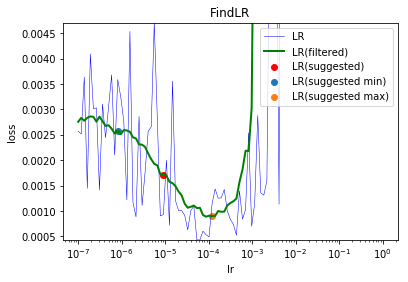

lr= 9.120108393559101e-06, lr_min=8.128305161640993e-07, lr_max=0.00012022644346174128


In [39]:
lr,(lr_min,lr_max,_)= FindLR(net, opt=opt, f_loss=f_loss, dl_train=dl_train, tfm_batch=tfm_batch, device=device)
print(f'lr= {lr}, lr_min={lr_min}, lr_max={lr_max}')

i_epoch	loss(train)	loss(test)	metric(test)	time
115	0.00034853	0.00070895	0.02639026	19.468292
116	0.00044157	0.00084911	0.02889577	19.491786
117	0.00044901	0.00076870	0.02743642	19.575535
118	0.00045479	0.00089047	0.02968544	19.756615
119	0.00043212	0.00078247	0.02775989	19.691323
120	0.00041492	0.00072001	0.02661169	19.713642
121	0.00043879	0.00121155	0.03455863	19.819236
122	0.00038180	0.00071481	0.02649796	19.750726
123	0.00037855	0.00070664	0.02634137	19.812169
124	0.00034489	0.00071397	0.02647948	19.762791
i_epoch	loss(train)	loss(test)	metric(test)	time
125	0.00031086	0.00072084	0.02658674	19.794009
126	0.00040406	0.00083232	0.02856920	19.752797
127	0.00062234	0.00102673	0.03183650	19.782968
128	0.00047287	0.00086742	0.02922313	19.770508
129	0.00036507	0.00077858	0.02768455	19.811384
130	0.00043390	0.00076134	0.02731538	19.805506
131	0.00041751	0.00071068	0.02639729	19.817930
132	0.00032379	0.00069843	0.02617924	19.785733
133	0.00032255	0.00070717	0.02629913	19.771444
134	0.000

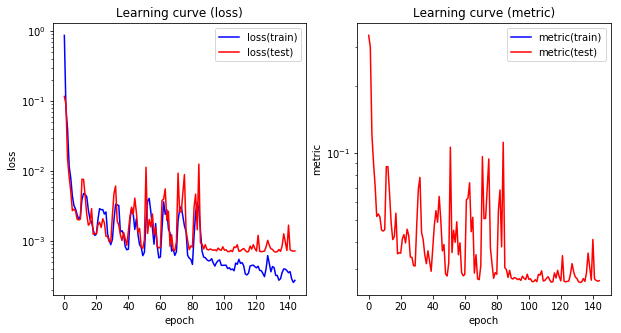

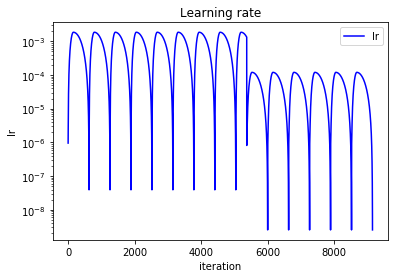

In [42]:
for i in range(3):
  FitOneCycle(net, n_epoch=10, lr_max=lr_max, div_init=lr_max/lr_min, 
      opt=opt, f_loss=f_loss, f_metric=f_metric,
      dl_train=dl_train, dl_test=dl_test, tfm_batch=tfm_batch,
      callbacks=(logger.Callbacks(),disp.Callbacks()),
      device=device)
logger.Plot()
logger.PlotLR()

In [41]:
min(logger.metric_test)

0.0262551152263768

In [ ]:
d= dset_test
idxes= np.random.permutation(len(d))[:15]
imgs= [d[i][0] for i in idxes]
pred= decode(Eval(net,imgs,device=device)).cpu()
labels= [f'test#{i}\n{d[i][1].item():.4f} / pred={lp.item():.4f}\nerr={lp.item()-d[i][1].item():.4f}' for i,lp in zip(idxes,pred)]
PlotImgGrid(imgs, labels)